In [26]:
# Importing correct packages
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

# Machine Learning Libraries
import lightgbm as lgb
import sklearn
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pickle

# Figures
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

# Packages version
print(pd.__version__)
print(np.__version__)
print(lgb.__version__)
print(sklearn.__version__)
print(sns.__version__)
print(matplotlib.__version__)

1.3.4
1.20.3
3.3.2
0.24.2
0.11.2
3.4.3


In [2]:
# No null values
df = pd.read_csv("train.csv")
df = df[:-9611]
df.drop(df.index[18800:40871],0,inplace=True)
df = df.reset_index(drop=True)
df.isna().sum()

C:\Users\vvaib\AppData\Local\Temp/ipykernel_18764/2470474217.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df.drop(df.index[18800:40871],0,inplace=True)


won                      0
shots                    0
shots_against            0
goals                    0
goals_against            0
takeaways                0
takeaways_against        0
hits                     0
hits_against             0
blocked_shots            0
blocked_shots_against    0
giveaways                0
giveaways_against        0
missed_shots             0
missed_shots_against     0
penalities               0
penalities_against       0
won_faceoffs             0
lost_faceoffs            0
hoa_away                 0
hoa_home                 0
dtype: int64

In [3]:
df.head(5)

,won,shots,shots_against,goals,goals_against,takeaways,takeaways_against,hits,hits_against,blocked_shots,blocked_shots_against,giveaways,giveaways_against,missed_shots,missed_shots_against,penalities,penalities_against,won_faceoffs,lost_faceoffs,hoa_away,hoa_home
0,0,8,8,0,3,1,3,14,5,3,3,6,7,4,0,1,1,10,12,1,0
1,1,8,8,3,0,3,1,5,14,3,3,7,6,0,4,1,1,12,10,0,1
2,1,11,12,0,1,0,2,4,4,6,8,2,0,6,3,1,3,11,9,1,0
3,0,12,11,1,0,2,0,4,4,8,6,0,2,3,6,3,1,9,11,0,1
4,1,9,8,0,1,3,2,4,5,7,1,7,5,3,8,2,1,7,11,1,0


In [4]:
# split data into X and y
y = df.pop('won')
X = df
# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [5]:
model = lgb.LGBMClassifier(learning_rate=0.09,max_depth=-5,random_state=42)
model.fit(X_train,y_train,eval_set=[(X_test,y_test),(X_train,y_train)],
          verbose=20,eval_metric='logloss')

C:\Users\vvaib\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	training's binary_logloss: 0.588145	valid_0's binary_logloss: 0.602557
[40]	training's binary_logloss: 0.564346	valid_0's binary_logloss: 0.599359
[60]	training's binary_logloss: 0.546199	valid_0's binary_logloss: 0.600596
[80]	training's binary_logloss: 0.529762	valid_0's binary_logloss: 0.60314
[100]	training's binary_logloss: 0.514817	valid_0's binary_logloss: 0.604746


LGBMClassifier(learning_rate=0.09, max_depth=-5, random_state=42)

In [6]:
print('Training accuracy {:.4f}'.format(model.score(X_train,y_train)))
print('Testing accuracy {:.4f}'.format(model.score(X_test,y_test)))

Training accuracy 0.7570
Testing accuracy 0.6538


In [7]:
# Interestingly, slightly better accuracy
# make predictions for test data
from sklearn.metrics import precision_score, recall_score
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print('Precision score: ', (precision_score(y_test, predictions)))
print('Recall score: ', recall_score(y_test, predictions))

Accuracy: 65.38%
Precision score:  0.6565500154846702
Recall score:  0.6459475929311396


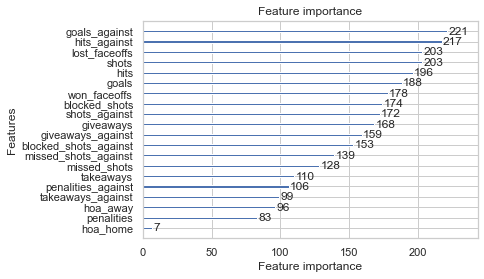

In [8]:
# plot feature importance
import lightgbm
from matplotlib import pyplot
lightgbm.plot_importance(model)
pyplot.show()

<AxesSubplot:title={'center':'Metric during training'}, xlabel='Iterations', ylabel='binary_logloss'>

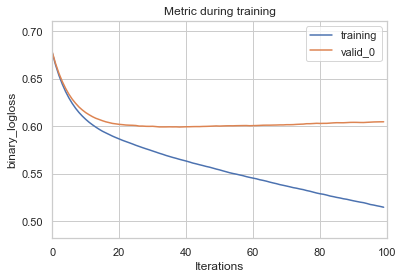

In [9]:
lgb.plot_metric(model)

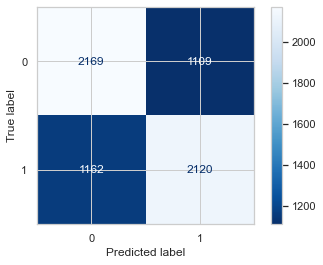

In [10]:
metrics.plot_confusion_matrix(model,X_test,y_test,cmap='Blues_r')

In [11]:
print(metrics.classification_report(y_test,model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.65      0.66      0.66      3278
           1       0.66      0.65      0.65      3282

    accuracy                           0.65      6560
   macro avg       0.65      0.65      0.65      6560
weighted avg       0.65      0.65      0.65      6560



In [12]:
### Create a Pickle file using serialization 
pickle_out = open("classifier.pkl","wb")
pickle.dump(model, pickle_out)
pickle_out.close()

In [13]:
import numpy as np

In [14]:
print(model.predict([[30,5,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0]]))
print(model.predict_proba([[30,5,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0]]))

[1]
[[0.44167824 0.55832176]]
